In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings(action='ignore') 

In [14]:
file_path = "/content/market-price.csv"
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])
bitcoin_df

,day,price
0,2018-12-11,3472.98
1,2018-12-12,3407.28
2,2018-12-13,3487.73
3,2018-12-14,3308.11
4,2018-12-15,3242.42
...,...,...
1091,2021-12-06,49380.43
1092,2021-12-07,50564.63
1093,2021-12-08,50645.41
1094,2021-12-09,50511.12


In [19]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1096 non-null   object 
 1   price   1096 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [20]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1096 non-null   datetime64[ns]
 1   price   1096 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [21]:
bitcoin_train_df = bitcoin_df.iloc[:int(1096*0.8)+1]
bitcoin_train_df

,day,price
0,2018-12-11,3472.98
1,2018-12-12,3407.28
2,2018-12-13,3487.73
3,2018-12-14,3308.11
4,2018-12-15,3242.42
...,...,...
872,2021-05-01,57796.62
873,2021-05-02,57857.50
874,2021-05-03,56610.46
875,2021-05-04,57213.33


In [22]:
bitcoin_train_df.shape

(877, 2)

In [23]:
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     877 non-null    datetime64[ns]
 1   price   877 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.8 KB


In [24]:
bitcoin_train_df.set_index('day', inplace=True)

In [25]:
bitcoin_train_df

,price
day,
2018-12-11,3472.98
2018-12-12,3407.28
2018-12-13,3487.73
2018-12-14,3308.11
2018-12-15,3242.42
...,...
2021-05-01,57796.62
2021-05-02,57857.50
2021-05-03,56610.46


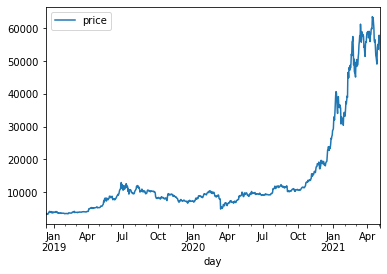

In [26]:
bitcoin_train_df.plot()

In [27]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [81]:
model = ARIMA(bitcoin_train_df.values, order=(7, 1, 3))

In [82]:
model_fit = model.fit(trend='c', full_output=True, disp=True)

In [83]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  876
Model:                 ARIMA(7, 1, 3)   Log Likelihood               -7135.246
Method:                       css-mle   S.D. of innovations            833.807
Date:                Fri, 10 Dec 2021   AIC                          14294.491
Time:                        03:43:03   BIC                          14351.796
Sample:                             1   HQIC                         14316.410
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.0566     28.202      2.023      0.043       1.782     112.332
ar.L1.D.y      0.1956      0.076      2.563      0.011       0.046       0.345
ar.L2.D.y      0.3173      0.079      4.022      0.000       0.163       0.472
ar.L3.D.y     -0.7412      0.052    -14.335      0.000      -0.842      -0.640
ar.L4.D.y     -0.0730      0.045     -1.622      0.105      -0.161       0.015
ar.L5.D.y      0.0239      0.045      0.530      0.596      -0.065       0.112
ar.L6.D.y      0.0573      0.038      1.504      0.133      -0.017       0.132
ar.L7.D.y     -0.1220      0.036     -3.349      0.001      -0.193      -0.051
ma.L1.D.y     -0.2372      0.071     -3.325      0.001      -0.377      -0.097
ma.L2.D.y     -0.2818      0.071     -3.977      0.000      -0.421      -0.143
ma.L3.D.y      0.8621      0.039     22.229      0.000       0.786       0.938
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0155           -0.0000j            1.0155           -0.5000
AR.2           -1.1028           -1.1681j            1.6064           -0.3704
AR.3           -1.1028           +1.1681j            1.6064            0.3704
AR.4            0.7183           -0.9411j            1.1840           -0.1462
AR.5            0.7183           +0.9411j            1.1840            0.1462
AR.6            1.1270           -0.9805j            1.4938           -0.1140
AR.7            1.1270           +0.9805j            1.4938            0.1140
MA.1           -1.0311           -0.0000j            1.0311           -0.5000
MA.2            0.6790           -0.8149j            1.0607           -0.1394
MA.3            0.6790           +0.8149j            1.0607            0.1394
-----------------------------------------------------------------------------
"""

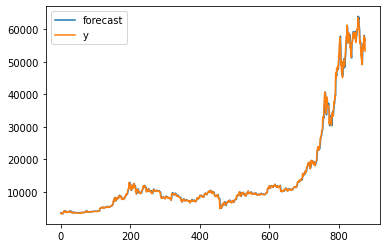

In [84]:
fig = model_fit.plot_predict()

In [85]:
forecast_data = model_fit.forecast(steps=1096-877)
forecast_data

(array([53063.02802351, 53516.21661846, 53171.41112319, 53682.40293914,
        53518.31750919, 53642.10653698, 53822.38965911, 54097.29778968,
        54142.2732461 , 54239.6046786 , 54063.80133017, 54114.88116917,
        54072.05405614, 54274.47855017, 54323.41155126, 54497.67295409,
        54456.23842565, 54552.29323549, 54497.94346698, 54630.33587686,
        54629.67829932, 54784.41579618, 54775.56307054, 54899.57430026,
        54871.29937037, 54991.14697725, 54978.4443164 , 55111.18956027,
        55106.52394486, 55232.47084556, 55220.86515129, 55338.90257055,
        55329.70811104, 55450.37934392, 55447.55831092, 55567.56643498,
        55564.75214227, 55680.0864528 , 55677.55212136, 55791.51102284,
        55792.28789046, 55905.77662143, 55908.48042314, 56019.58140858,
        56023.08944077, 56132.16267753, 56137.5043866 , 56245.48653027,
        56252.7513062 , 56359.19990541, 56367.73841167, 56472.43363881,
        56482.35572488, 56585.6931003 , 56597.20159852, 56699.22

In [86]:
bitcoin_test_df = bitcoin_df[877:]
bitcoin_test_df

,day,price
877,2021-05-06,57473.23
878,2021-05-07,56428.16
879,2021-05-08,57380.27
880,2021-05-09,58928.81
881,2021-05-10,58280.73
...,...,...
1091,2021-12-06,49380.43
1092,2021-12-07,50564.63
1093,2021-12-08,50645.41
1094,2021-12-09,50511.12


In [87]:
pred_y = forecast_data[0]
pred_y

array([53063.02802351, 53516.21661846, 53171.41112319, 53682.40293914,
       53518.31750919, 53642.10653698, 53822.38965911, 54097.29778968,
       54142.2732461 , 54239.6046786 , 54063.80133017, 54114.88116917,
       54072.05405614, 54274.47855017, 54323.41155126, 54497.67295409,
       54456.23842565, 54552.29323549, 54497.94346698, 54630.33587686,
       54629.67829932, 54784.41579618, 54775.56307054, 54899.57430026,
       54871.29937037, 54991.14697725, 54978.4443164 , 55111.18956027,
       55106.52394486, 55232.47084556, 55220.86515129, 55338.90257055,
       55329.70811104, 55450.37934392, 55447.55831092, 55567.56643498,
       55564.75214227, 55680.0864528 , 55677.55212136, 55791.51102284,
       55792.28789046, 55905.77662143, 55908.48042314, 56019.58140858,
       56023.08944077, 56132.16267753, 56137.5043866 , 56245.48653027,
       56252.7513062 , 56359.19990541, 56367.73841167, 56472.43363881,
       56482.35572488, 56585.6931003 , 56597.20159852, 56699.22913345,
      

In [88]:
bitcoin_test_df.price

877     57473.23
878     56428.16
879     57380.27
880     58928.81
881     58280.73
          ...   
1091    49380.43
1092    50564.63
1093    50645.41
1094    50511.12
1095    47659.68
Name: price, Length: 219, dtype: float64

In [89]:
bitcoin_test_df.values

array([[Timestamp('2021-05-06 00:00:00'), 57473.23],
       [Timestamp('2021-05-07 00:00:00'), 56428.16],
       [Timestamp('2021-05-08 00:00:00'), 57380.27],
       [Timestamp('2021-05-09 00:00:00'), 58928.81],
       [Timestamp('2021-05-10 00:00:00'), 58280.73],
       [Timestamp('2021-05-11 00:00:00'), 55883.5],
       [Timestamp('2021-05-12 00:00:00'), 56750.0],
       [Timestamp('2021-05-13 00:00:00'), 49007.09],
       [Timestamp('2021-05-14 00:00:00'), 49702.27],
       [Timestamp('2021-05-15 00:00:00'), 49922.52],
       [Timestamp('2021-05-16 00:00:00'), 46736.58],
       [Timestamp('2021-05-17 00:00:00'), 46441.64],
       [Timestamp('2021-05-18 00:00:00'), 43596.24],
       [Timestamp('2021-05-19 00:00:00'), 42912.19],
       [Timestamp('2021-05-20 00:00:00'), 36964.27],
       [Timestamp('2021-05-21 00:00:00'), 40784.32],
       [Timestamp('2021-05-22 00:00:00'), 37280.35],
       [Timestamp('2021-05-23 00:00:00'), 37528.3],
       [Timestamp('2021-05-24 00:00:00'), 34754.5

In [90]:
test_y = bitcoin_test_df.price.values
test_y

array([57473.23, 56428.16, 57380.27, 58928.81, 58280.73, 55883.5 ,
       56750.  , 49007.09, 49702.27, 49922.52, 46736.58, 46441.64,
       43596.24, 42912.19, 36964.27, 40784.32, 37280.35, 37528.3 ,
       34754.54, 38728.59, 38410.5 , 39266.04, 38445.29, 35689.62,
       34647.67, 35684.59, 37310.54, 36662.64, 37585.24, 39188.59,
       36885.51, 35530.38, 35816.17, 33514.87, 33450.19, 37338.36,
       36704.57, 37313.18, 35494.9 , 39066.82, 40525.8 , 40188.56,
       38324.87, 38068.04, 35729.82, 35524.17, 35592.35, 31686.55,
       32447.59, 33674.66, 34639.38, 31640.58, 32160.91, 34644.45,
       34456.67, 35847.7 , 35047.36, 33536.88, 33856.86, 34688.98,
       35309.3 , 33747.97, 34211.01, 33839.04, 32877.41, 33818.52,
       33515.57, 34227.64, 33158.25, 32686.56, 32814.61, 31738.59,
       31421.25, 31520.66, 31783.49, 30815.94, 29790.24, 32118.06,
       32297.89, 33581.63, 34279.34, 35365.2 , 37318.14, 39405.95,
       40002.53, 40005.93, 42214.15, 41659.06, 40000.46, 39193

In [91]:
test_y = test_y.tolist()
test_y

[57473.23,
 56428.16,
 57380.27,
 58928.81,
 58280.73,
 55883.5,
 56750.0,
 49007.09,
 49702.27,
 49922.52,
 46736.58,
 46441.64,
 43596.24,
 42912.19,
 36964.27,
 40784.32,
 37280.35,
 37528.3,
 34754.54,
 38728.59,
 38410.5,
 39266.04,
 38445.29,
 35689.62,
 34647.67,
 35684.59,
 37310.54,
 36662.64,
 37585.24,
 39188.59,
 36885.51,
 35530.38,
 35816.17,
 33514.87,
 33450.19,
 37338.36,
 36704.57,
 37313.18,
 35494.9,
 39066.82,
 40525.8,
 40188.56,
 38324.87,
 38068.04,
 35729.82,
 35524.17,
 35592.35,
 31686.55,
 32447.59,
 33674.66,
 34639.38,
 31640.58,
 32160.91,
 34644.45,
 34456.67,
 35847.7,
 35047.36,
 33536.88,
 33856.86,
 34688.98,
 35309.3,
 33747.97,
 34211.01,
 33839.04,
 32877.41,
 33818.52,
 33515.57,
 34227.64,
 33158.25,
 32686.56,
 32814.61,
 31738.59,
 31421.25,
 31520.66,
 31783.49,
 30815.94,
 29790.24,
 32118.06,
 32297.89,
 33581.63,
 34279.34,
 35365.2,
 37318.14,
 39405.95,
 40002.53,
 40005.93,
 42214.15,
 41659.06,
 40000.46,
 39193.94,
 38138.0,
 39750.14

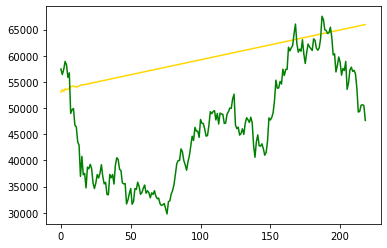

In [92]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color='green')

In [93]:
highest = forecast_data[2][:,1].tolist()
lowest = forecast_data[2][:,0].tolist()
highest, lowest

([54697.2601622171,
  55779.83730265992,
  55949.75715945478,
  56990.55607978451,
  57273.55371596236,
  57825.206550118186,
  58376.994329130095,
  58928.98988876615,
  59210.55350644866,
  59520.91307764573,
  59573.77953570185,
  59867.49364872992,
  60076.679642689545,
  60513.09394069193,
  60778.748941722915,
  61147.32402893789,
  61296.022158224034,
  61578.04163392936,
  61714.999641182316,
  62033.69231838969,
  62217.088106008414,
  62544.9626607707,
  62705.95530144303,
  62992.917011392805,
  63128.65053549388,
  63408.192249791406,
  63555.61522028389,
  63842.500663069004,
  63990.8998300901,
  64264.25448802968,
  64400.05290881143,
  64661.31319139877,
  64795.83725100148,
  65056.057933959644,
  65192.720753015456,
  65447.94811859051,
  65580.35039843578,
  65827.20997402693,
  65956.51796440387,
  66198.95032550882,
  66328.4243244738,
  66567.2819524959,
  66695.4957085547,
  66928.9997031312,
  67055.1531493376,
  67284.01976483536,
  67409.41659005934,
  67634.7

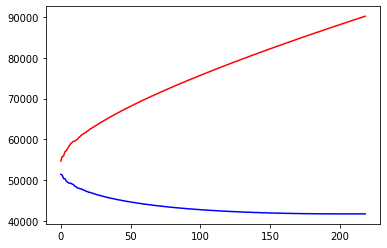

In [94]:
plt.plot(highest, color='red')
plt.plot(lowest, color='blue')
plt.show()

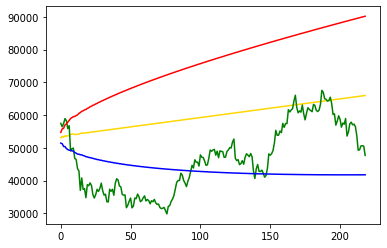

In [95]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color='green')
plt.plot(highest, color='red')
plt.plot(lowest, color='blue')
plt.show()